**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# write your code here

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [ ]:
import sympy as sp

# define the variables
L, w, tau, kappa, alpha, nu, G = sp.symbols('L w tau kappa alpha nu G')

# tilde{w}
w_tilde = (1 - tau)*w

# define the consumption
C = kappa + w_tilde*L

# define the utility function
V = sp.log(C**alpha * G**(1 - alpha)) - nu*L**2 / 2

# take derivative of V with respect to L
dVdL = sp.diff(V, L)

# solve for L
solution = sp.solve(dVdL, L)


print('The solutions for L are:', solution)

Since $sqrt(4α*w^2*(1-τ)^2/ν + κ^2) = sqrt(κ^2 + 4α/ν*tilde{w}^2)$
So we have
L* = (kappa*nu + sqrt(nu*(4*alpha*tau**2*w**2 - 8*alpha*tau*w**2 + 4*alpha*w**2 + kappa**2*nu)))/(2*nu*w*(tau - 1))
Is equal to
L* = (-κ + sqrt(κ^2 + 4α/ν*tilde{w}^2))/(2*tilde{w})

In [2]:
# write your code here
import sympy as sp

# Define the variables
L, C, w, tau, kappa, alpha, nu = sp.symbols('L C w tau kappa alpha nu')

# Define the utility function
utility = sp.log(C**alpha * G**(1 - alpha)) - nu * L**2 / 2

# Define the budget constraint
budget_constraint = sp.Eq(C, kappa + (1 - tau) * w * L)

# Solve for L in the budget constraint
L_solution = sp.solve(budget_constraint, L)[0]

# Substitute the solution for L in the utility function
utility_substituted = utility.subs(L, L_solution)

# Simplify the utility function
utility_simplified = sp.simplify(utility_substituted)

# Display the expression for L_star
L_star = sp.symbols('L_star')
eq_L_star = sp.Eq(L_star, L_solution)

print("Optimal labor supply choice L_star:")
sp.pprint(eq_L_star)

NameError: name 'G' is not defined

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

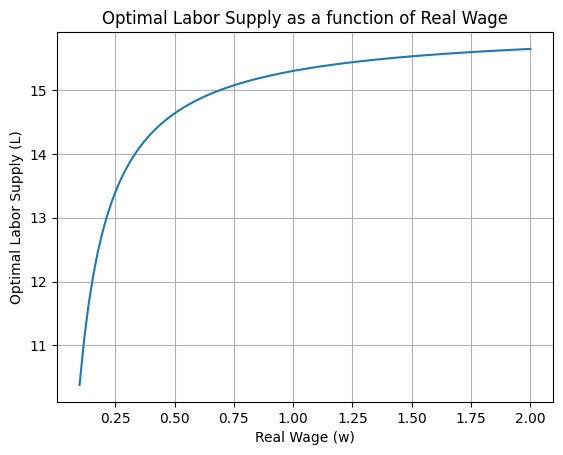

In [3]:
# write your code here
# write your code here
import math
import numpy as np
import matplotlib.pyplot as plt

# Parameter values
τ = 0.30
κ = 1.0
α = 0.5
ν = 1 / (2 * 16**2)
G = 1.0

def calculate_optimal_labor_choice(w):
    tilde_w = (1 - τ) * w
    delta = math.sqrt(κ**2 + 4 * α / ν * tilde_w**2)
    L_star = (-κ + delta) / (2 * tilde_w)
    return L_star

# Calculate L(w) for a range of w values
w_values = np.linspace(0.1, 2.0, 100)
L_values = [calculate_optimal_labor_choice(w) for w in w_values]

# Plot the results
plt.plot(w_values, L_values)
plt.xlabel("Real Wage (w)")
plt.ylabel("Optimal Labor Supply (L)")
plt.title("Optimal Labor Supply as a function of Real Wage")
plt.grid(True)
plt.show()


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [4]:
# write your code here
import numpy as np
import matplotlib.pyplot as plt

# Define the variables and parameters
w = 1.0
kappa = 1.0
alpha = 0.5
nu = 1 / (2 * 16**2)
tau_values = np.linspace(0, 1, 100)  # Grid of tau values

# Initialize arrays to store results
L_values = []
G_values = []
utility_values = []

# Calculate implied L, G, and utility for each tau value
for tau in tau_values:
    tilde_w = (1 - tau) * w
    L_star = (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * tilde_w**2)) / (2 * tilde_w)
    G = tau * w * L_star
    utility = np.log((kappa + (1 - tau) * w * L_star)**alpha * G**(1 - alpha)) - nu * L_star**2 / 2

    L_values.append(L_star)
    G_values.append(G)
    utility_values.append(utility)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(tau_values, L_values, label='L')
plt.plot(tau_values, G_values, label='G')
plt.plot(tau_values, utility_values, label='Utility')
plt.xlabel('Tax Rate (tau)')
plt.ylabel('Value')
plt.title('Implications of tau on L, G, and Utility')
plt.legend()
plt.grid(True)
plt.show()

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

Optimal tax rate (tau_star): 0.5145311264139927
Maximized worker utility: 1.8591992509323028


C:\Users\andre\AppData\Local\Temp\ipykernel_23140\2023066052.py:16: RuntimeWarning: divide by zero encountered in log
  utility = np.log((kappa + (1 - tau) * w * L_star)**alpha * (tau * w * L_star)**(1 - alpha)) - nu * L_star**2 / 2
C:\Users\andre\AppData\Local\Temp\ipykernel_23140\2023066052.py:15: RuntimeWarning: invalid value encountered in scalar divide
  L_star = (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * tilde_w**2)) / (2 * tilde_w)


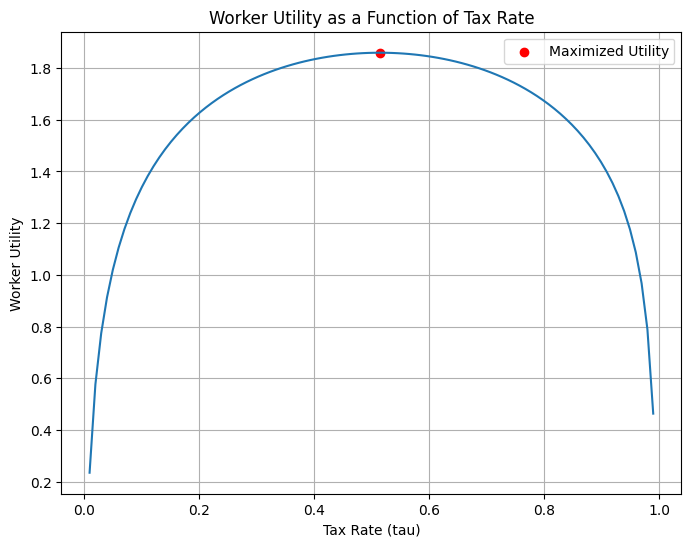

In [1]:
# write your code here
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the variables and parameters
w = 1.0
kappa = 1.0
alpha = 0.5
nu = 1 / (2 * 16**2)

# Define the worker utility function
def worker_utility(tau):
    tilde_w = (1 - tau) * w
    L_star = (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * tilde_w**2)) / (2 * tilde_w)
    utility = np.log((kappa + (1 - tau) * w * L_star)**alpha * (tau * w * L_star)**(1 - alpha)) - nu * L_star**2 / 2
    return -utility  # Negative sign for maximization

# Perform numerical optimization to find the optimal tau
result = minimize(worker_utility, x0=0.5, bounds=[(0, 1)])

tau_star = result.x[0]
utility_star = -result.fun

print("Optimal tax rate (tau_star):", tau_star)
print("Maximized worker utility:", utility_star)

# Plot the worker utility function
tau_values = np.linspace(0, 1, 100)
utility_values = [-worker_utility(tau) for tau in tau_values]

plt.figure(figsize=(8, 6))
plt.plot(tau_values, utility_values)
plt.scatter(tau_star, utility_star, color='red', label='Maximized Utility')
plt.xlabel('Tax Rate (tau)')
plt.ylabel('Worker Utility')
plt.title('Worker Utility as a Function of Tax Rate')
plt.legend()
plt.grid(True)
plt.show()

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [12]:
import numpy as np
from scipy.optimize import minimize_scalar

# Given parameter values
tau = 0.540
kappa = 1.0
alpha = 0.5
nu = 1 / (2 * 16 ** 2)
sigma = 1.001
rho = 1.001
epsilon = 1.0
w = 1.0
G = 1.0  # The value of G to substitute in the equation

# Define the objective function
def objective_function(L):
    C = kappa + (1 - tau) * w * L
    value = G - tau * w * ((alpha * C ** ((sigma - 1) / sigma) + (1 - alpha) * G ** ((sigma - 1) / sigma)) ** (sigma / (1 - sigma))) ** (1 - rho) * (1 - rho) / (alpha * C ** ((sigma - 1) / sigma) + (1 - alpha) * G ** ((sigma - 1) / sigma)) - nu * (L ** (1 + epsilon)) / (1 + epsilon)
    return value

# Find the value of L^* that satisfies the equation
initial_guess = 1.0  # Initial guess for L
optimization_result = minimize_scalar(objective_function, bounds=(0, 24), method='bounded')

# Extract the optimal L value
L_star = optimization_result.x

# Print the optimal L value
print("Optimal Labor Supply (L^*):", L_star)

Optimal Labor Supply (L^*): 23.999995716813203


In [13]:
import numpy as np
from scipy.optimize import minimize_scalar

# Given parameter values
tau = 0.540
kappa = 1.0
alpha = 0.5
nu = 1 / (2 * 16 ** 2)
sigma = 1.001
rho = 1.001
epsilon = 1.0
w = 1.0

# Define the equation to solve for G
def equation_to_solve(G):
    L_star = 23.999995716813203
    return G - tau * w * L_star

# Find the value of G that satisfies the equation
initial_guess = 1.0  # Initial guess for G
optimization_result = minimize_scalar(equation_to_solve, bounds=(0, 100), method='bounded', options={'xatol': 1e-8})

# Extract the optimal G value
G_star = optimization_result.x

# Print the optimal G value
print("Optimal G value (G^*):", G_star)

Optimal G value (G^*): 5.749176315178768e-09


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [7]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [4]:
# write your code here
import sympy as sp

# Define the symbols
ell_t, kappa_t, eta, w = sp.symbols('ell_t kappa_t eta w')

# Define the profit function
profit = kappa_t * ell_t**(1 - eta) - w * ell_t

# Set the baseline parameters
eta_value = 0.5
w_value = 1.0

# Calculate the profit for different values of ell_t and verify the maximum
kappa_values = [1.0, 2.0]
for kappa in kappa_values:
    # Calculate the ell_t that maximizes the profit
    ell_optimal = sp.solve(sp.diff(profit.subs([(kappa_t, kappa), (eta, eta_value), (w, w_value)]), ell_t), ell_t)[0]
    # Calculate the maximum profit
    profit_max = profit.subs([(kappa_t, kappa), (eta, eta_value), (w, w_value), (ell_t, ell_optimal)])
    
    # Ensure ell_optimal is a whole number
    ell_optimal = sp.ceiling(ell_optimal)
    
    # Print the results
    print(f'For kappa = {kappa}:')
    print(f'The optimal number of hairdressers (ell_t) is: {ell_optimal.evalf()}')
    print(f'The maximum profit is: {profit_max.evalf()}\n')

For kappa = 1.0:
The optimal number of hairdressers (ell_t) is: 1.00000000000000
The maximum profit is: 0.250000000000000

For kappa = 2.0:
The optimal number of hairdressers (ell_t) is: 1.00000000000000
The maximum profit is: 1.00000000000000



We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [9]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [10]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [11]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [12]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [13]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [14]:
# write your code here
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def objective_function(x):
    return griewank([x[0], x[1]])

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1 ** 2 / 4000 + x2 ** 2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tau, K_warmup, K, optimizer):
    x_star = None
    x0_values = []

    for k in range(K):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)
        
        if k >= K_warmup:
            chi_k = 0.50 * (2 / (1 + np.exp((k - K_warmup) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star
        else:
            x_k0 = x_k
        
        res = minimize(objective_function, x_k0, method=optimizer, tol=tau)
        x_k_star = res.x
        
        if x_star is None or objective_function(x_k_star) < objective_function(x_star):
            x_star = x_k_star
        
        x0_values.append(x_k0)

        if objective_function(x_star) < tau:
            break
    
    return x_star, x0_values

# Settings
bounds = [-600, 600]
tau = 1e-8
K_warmup = 10
K = 1000

# Run refined global optimizer
x_star, x0_values = refined_global_optimizer(bounds, tau, K_warmup, K, 'BFGS')

# Plotting the effective initial guesses
x0_values = np.array(x0_values)
plt.plot(x0_values[:, 0], x0_values[:, 1], 'bo', markersize=3)
plt.plot(x_star[0], x_star[1], 'ro', label='Final Solution')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Effective Initial Guesses')
plt.legend()
plt.grid(True)
plt.show()

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [15]:
# write your code here
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def objective_function(x):
    return griewank([x[0], x[1]])

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1 ** 2 / 4000 + x2 ** 2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tau, K_warmup, K, optimizer):
    x_star = None
    x0_values = []
    objective_values = []

    for k in range(K):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)
        
        if k >= K_warmup:
            chi_k = 0.50 * (2 / (1 + np.exp((k - K_warmup) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star
        else:
            x_k0 = x_k
        
        res = minimize(objective_function, x_k0, method=optimizer, tol=tau)
        x_k_star = res.x
        f_k_star = objective_function(x_k_star)
        
        if x_star is None or f_k_star < objective_function(x_star):
            x_star = x_k_star
        
        x0_values.append(x_k0)
        objective_values.append(f_k_star)

        if f_k_star < tau:
            break
    
    return x_star, x0_values, objective_values

# Settings
bounds = [-600, 600]
tau = 1e-8
K_warmup = 100
K = 1000

# Run refined global optimizer
x_star, x0_values, objective_values = refined_global_optimizer(bounds, tau, K_warmup, K, 'BFGS')

# Plotting the effective initial guesses
x0_values = np.array(x0_values)
plt.plot(x0_values[:, 0], x0_values[:, 1], 'bo', markersize=3)
plt.plot(x_star[0], x_star[1], 'ro', label='Final Solution')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Effective Initial Guesses (K_warmup = 100)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the convergence
iterations = np.arange(len(objective_values))
plt.plot(iterations, objective_values)
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Convergence')
plt.grid(True)
plt.show()